Epoch [1/10]  Loss: 0.0580  Accuracy: 94.20%
Epoch [2/10]  Loss: 0.0295  Accuracy: 97.05%
Epoch [3/10]  Loss: 0.0251  Accuracy: 97.49%
Epoch [4/10]  Loss: 0.0222  Accuracy: 97.78%
Epoch [5/10]  Loss: 0.0199  Accuracy: 98.01%
Epoch [6/10]  Loss: 0.0185  Accuracy: 98.15%
Epoch [7/10]  Loss: 0.0176  Accuracy: 98.24%
Epoch [8/10]  Loss: 0.0168  Accuracy: 98.32%
Epoch [9/10]  Loss: 0.0159  Accuracy: 98.41%
Epoch [10/10]  Loss: 0.0152  Accuracy: 98.48%


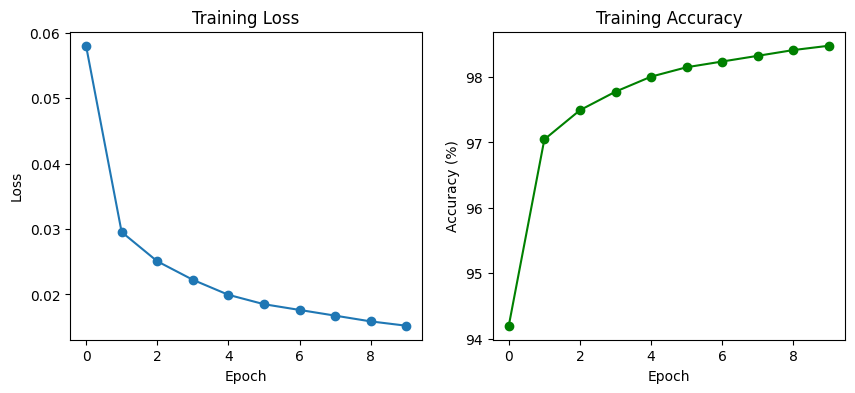

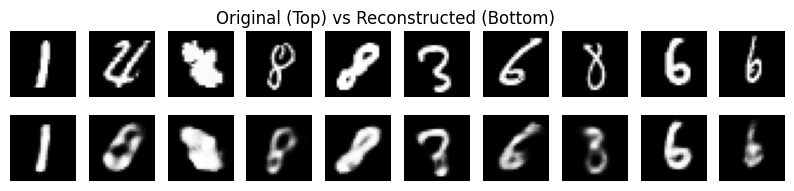

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

transform = transforms.Compose([transforms.ToTensor()])
train_data = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=128, shuffle=True)

class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 16)
        )

        self.decoder = nn.Sequential(
            nn.Linear(16, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28*28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = x.view(-1, 28*28)
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
train_losses = []
accuracies = []

for epoch in range(num_epochs):
    total_loss = 0
    total_acc = 0
    for img, _ in train_loader:
        output = model(img)
        loss = criterion(output, img.view(-1, 28*28))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

        acc = (1 - loss.item()) * 100
        total_acc += acc

    avg_loss = total_loss / len(train_loader)
    avg_acc = total_acc / len(train_loader)
    train_losses.append(avg_loss)
    accuracies.append(avg_acc)
    print(f"Epoch [{epoch+1}/{num_epochs}]  Loss: {avg_loss:.4f}  Accuracy: {avg_acc:.2f}%")


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, marker='o')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.plot(accuracies, marker='o', color='green')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy (%)")
plt.show()

sample = next(iter(train_loader))[0][:10]
with torch.no_grad():
    reconstructed = model(sample)

plt.figure(figsize=(10,2))
for i in range(10):

    plt.subplot(2,10,i+1)
    plt.imshow(sample[i].squeeze(), cmap='gray')
    plt.axis('off')

    plt.subplot(2,10,i+11)
    plt.imshow(reconstructed[i].view(28,28).detach().numpy(), cmap='gray')
    plt.axis('off')
plt.suptitle("Original (Top) vs Reconstructed (Bottom)")
plt.show()
